In [49]:
#To import the necessary libraries that are required for the code to run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#to read the CSV as a Pandas DataFrame
raw_df = pd.read_csv(r"C:\Users\timot\OneDrive\Documents\SUSS\ANL252 - Python\TMA\Raw dataset\TMA_Data.csv")
raw_df

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.40,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.60,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.40,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.10,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.00,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2/16/2015,NaN,IT,89883,Meet,3.69,5,15
246,247,Zane Downes,10/24/87,M,Married,Non-Resident,No,4/20/2017,NaN,IT,90100,Meet,3.40,3,14
247,248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,1/5/2014,NaN,IT,138888,Exceed,4.30,5,4
248,249,Zoya Easton,8/2/1980,F,Single,Non-Resident,No,8/13/2012,9/1/2015,Manufacturing,50274,To Improve,2.50,3,13


In [51]:
# ========1(B)========

#a copy of raw_df is created so that it can be cleaned up and transformed for the purposes of 1(b)
df_1b = raw_df.copy()
#As 'ID' is a unique identifier for each employee, it is set as the index of the df_1b DataFrame
df_1b.set_index("ID", inplace=True)
df_1b

,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
ID,,,,,,,,,,,,,,
1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.40,5,15
2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.60,3,20
3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.40,4,14
4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.10,4,20
5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.00,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2/16/2015,NaN,IT,89883,Meet,3.69,5,15
247,Zane Downes,10/24/87,M,Married,Non-Resident,No,4/20/2017,NaN,IT,90100,Meet,3.40,3,14
248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,1/5/2014,NaN,IT,138888,Exceed,4.30,5,4


In [52]:
#---SALARY STATISTICS---

#This is to aggregate the df_1b DataFrame at a 'Unit' level
unit_group = df_1b.groupby("Unit")
#This computes the mean salary aggregated at a 'Unit' level, and then stores it in a DataFrame called salary_output_table
salary_output_table = unit_group["Salary"].mean()
#This computes the population standard deviation aggregated at a 'Unit' level
salary_std_dev = unit_group["Salary"].std(ddof=0)
salary_output_table = pd.DataFrame(salary_output_table)
salary_output_table

,Salary
Unit,
Admin,77315.285714
C-Level,250000.000000
Engineering,95867.000000
IT,95550.756098
Manufacturing,59412.905325
Sales,71426.590909


In [53]:
#To create a new column for standard deviation of salary in the salary_output_table DataFrame
salary_output_table["Standard Deviation"] = salary_std_dev
salary_output_table

,Salary,Standard Deviation
Unit,,
Admin,77315.285714,19983.704002
C-Level,250000.000000,0.000000
Engineering,95867.000000,9113.017338
IT,95550.756098,28782.057242
Manufacturing,59412.905325,8520.514227
Sales,71426.590909,24315.797829


In [54]:
#This step serves to filter out the C-level employee record, and subsequently delete that row in the df_1b DataFrame. The purpose is to compute the organisational mean and standard deviation of salary excluding that of the C-level employee
c_level_filt = (df_1b["Unit"] == "C-Level")
df_1b.drop(index=df_1b[c_level_filt].index, inplace=True)

organisational_average_salary = df_1b["Salary"].mean()
organisational_StdDev_salary = df_1b["Salary"].std(ddof=0)

In [55]:
#This is to add a new row in the salary_output_table DataFrame for the data on the Organisational mean and standard deviation of salary excluding that of the C-level employee
salary_output_table.loc['Organisational Average (excluding C-level)'] = [organisational_average_salary, organisational_StdDev_salary]
salary_output_table

,Salary,Standard Deviation
Unit,,
Admin,77315.285714,19983.704002
C-Level,250000.000000,0.000000
Engineering,95867.000000,9113.017338
IT,95550.756098,28782.057242
Manufacturing,59412.905325,8520.514227
Sales,71426.590909,24315.797829
Organisational Average (excluding C-level),68392.064257,21494.675478


In [56]:
#This is to cast the format of the salary and standard deviation figures to be that of currency to 2 d.p.
salary_output_table['Salary'] = salary_output_table['Salary'].map('${:,.2f}'.format)
salary_output_table['Standard Deviation'] = salary_output_table['Standard Deviation'].map('${:,.2f}'.format)
salary_output_table

,Salary,Standard Deviation
Unit,,
Admin,"$77,315.29","$19,983.70"
C-Level,"$250,000.00",$0.00
Engineering,"$95,867.00","$9,113.02"
IT,"$95,550.76","$28,782.06"
Manufacturing,"$59,412.91","$8,520.51"
Sales,"$71,426.59","$24,315.80"
Organisational Average (excluding C-level),"$68,392.06","$21,494.68"


In [57]:
#as the step above converted the salary and standard deviation figures to be strings, we will need to recast them to be a float again so that we can plot a graph later on. To simplify the code, parsing is done using regex
salary_output_table_for_graph = salary_output_table.copy()
salary_output_table_for_graph.drop(index=['C-Level', 'Organisational Average (excluding C-level)'], inplace=True)
salary_output_table_for_graph

salary_output_table_for_graph['Salary'] = salary_output_table_for_graph['Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)
salary_output_table_for_graph['Standard Deviation'] = salary_output_table_for_graph['Standard Deviation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
salary_output_table_for_graph

,Salary,Standard Deviation
Unit,,
Admin,77315.29,19983.70
Engineering,95867.00,9113.02
IT,95550.76,28782.06
Manufacturing,59412.91,8520.51
Sales,71426.59,24315.80


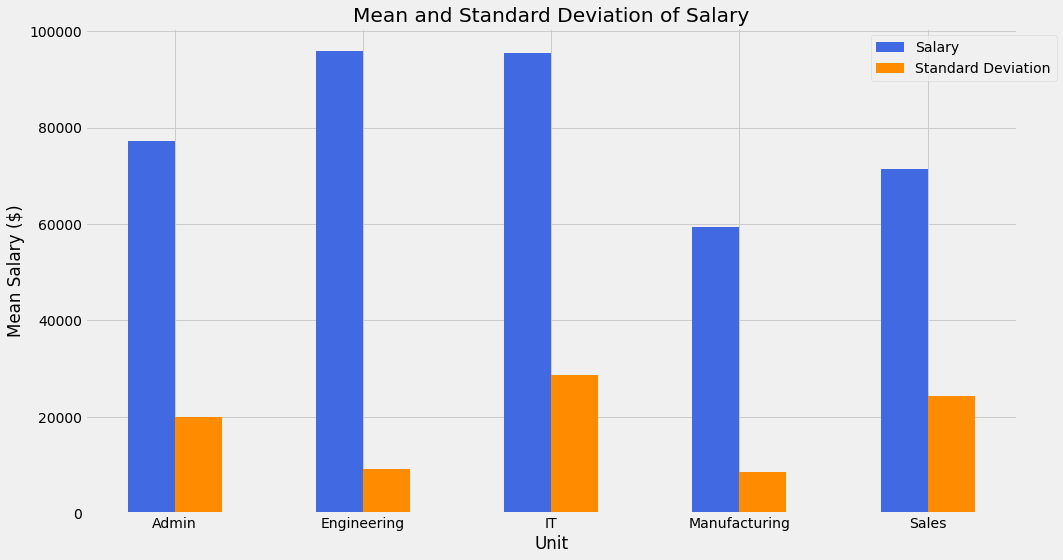

In [58]:
#matplotlib is used to create a comparative vertical bar chart. The parameters (e.g. title, colour, legend location, etc.) are specified accordingly. As there is no direct method to create a comparative bar chart in matplotlib, both bars have to be manually offset via the 'width' variable
plt.figure(figsize=(15,8))

title = 'Mean and Standard Deviation of Salary'

x_index_list = ['Admin','Engineering','IT','Manufacturing','Sales']
x_index_values = np.arange(len(x_index_list))
width = 0.25

plt.bar(x_index_values-width/2, salary_output_table_for_graph['Salary'], width=width, color='royalblue', label='Salary')
plt.bar(x_index_values+width/2, salary_output_table_for_graph['Standard Deviation'], width=width, color='darkorange',label='Standard Deviation')

plt.style.use('fivethirtyeight')

plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(ticks=x_index_values, labels=x_index_list)
plt.xlabel('Unit')
plt.ylabel("Mean Salary ($)")
plt.title(title)

plt.tight_layout()

plt.show()

In [59]:
#---GENDER STATISTICS---

#This is to aggregate the df_1b DataFrame at a 'Unit' and then 'Gender' level as new DataFrame, i.e. gender_group
gender_group = raw_df.groupby(['Unit','Gender'])
#this serves to count the number of non-NA values in each row/column in the gender_group DataFrame
gender_count_table = gender_group.count()
gender_count_table

ID  Staff  BirthYear  Marital  Citizenship  Minority  \
Unit          Gender                                                          
Admin         F         4      4          4        4            4         4   
              M         3      3          3        3            3         3   
C-Level       F         1      1          1        1            1         1   
Engineering   F         5      5          5        5            5         5   
              M         5      5          5        5            5         5   
IT            F        18     18         18       18           18        18   
              M        23     23         23       23           23        23   
Manufacturing F       105    105        105      105          105       105   
              M        64     64         64       64           64        64   
Sales         F        11     11         11       11           11        11   
              M        11     11         11       11           11        11   

                      JoinDate  LeftDate  Salary  PerformanceScore  Survey  \
Unit          Gender                                                         
Admin         F              4         0       4                 4       4   
              M              3         0       3                 3       3   
C-Level       F              1         0       1                 1       1   
Engineering   F              5         1       5                 5       5   
              M              5         3       5                 5       5   
IT            F             18         2      18                18      18   
              M             23         5      23                23      23   
Manufacturing F            105        43     105               105     105   
              M             64        28      64                64      64   
Sales         F             11         2      11                11      11   
              M             11         1      11                11      11   

                      Satisfaction  Absence  
Unit          Gender                         
Admin         F                  4        4  
              M                  3        3  
C-Level       F                  1        1  
Engineering   F                  5        5  
              M                  5        5  
IT            F                 18       18  
              M                 23       23  
Manufacturing F                105      105  
              M                 64       64  
Sales         F                 11       11  
              M                 11       11

In [60]:
#Due to the structure of the DataFrame and aggreation type, the gender_group DataFrame is multiIndexed. For ease of plotting the bar chart later on, we can transform it to a DataFrame that has a single index via the unstack() function
gender_count_table = gender_count_table.unstack()
gender_count_table = gender_count_table['Staff']
gender_count_table

Gender,F,M
Unit,,
Admin,4.0,3.0
C-Level,1.0,NaN
Engineering,5.0,5.0
IT,18.0,23.0
Manufacturing,105.0,64.0
Sales,11.0,11.0


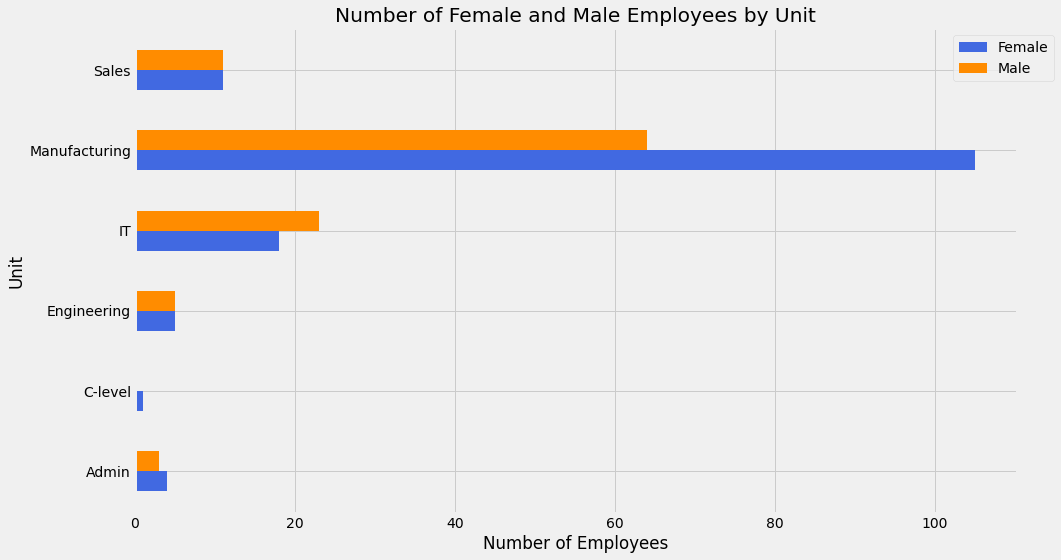

In [61]:
#matplotlib is used to create a comparative grouped horizontal bar chart. The parameters (e.g. title, colour, legend location, etc.) are specified accordingly. As there is no direct method to create a comparative bar chart in matplotlib, both bars have to be manually offset via the 'width' variable
plt.figure(figsize=(15,8))

title = 'Number of Female and Male Employees by Unit'

y_index_list = ['Admin','C-level','Engineering','IT','Manufacturing','Sales']
y_index_values = np.arange(len(y_index_list))

height = 0.25

plt.barh(y_index_values-height/2, gender_count_table['F'],height=height, color='royalblue', label='Female')
plt.barh(y_index_values+height/2, gender_count_table['M '],height=height, color='darkorange', label='Male')

plt.style.use('fivethirtyeight')

plt.legend(bbox_to_anchor = (1.05,1))
plt.yticks(ticks=y_index_values, labels=y_index_list)
plt.xlabel('Number of Employees')
plt.ylabel("Unit")
plt.title(title)

plt.tight_layout()

plt.show()

In [62]:
# ========1(C)========

#a copy of raw_df is created so that it can be cleaned up and transformed for the purposes of 1(c)
df_1c = raw_df.copy()

In [63]:
#This is to convert the data in the 'JoinDate' and 'LeftDate' columns to a datetime datatype. This will allow us to compute the length of service later via a timedelta
df_1c['JoinDate'] = pd.to_datetime(df_1c['JoinDate'])
df_1c['LeftDate'] = pd.to_datetime(df_1c['LeftDate'])
df_1c

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,2012-04-02,NaT,Manufacturing,46335,Meet,3.40,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-05-12,NaT,Manufacturing,66825,Meet,4.60,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,2014-09-29,NaT,Manufacturing,60446,Meet,3.40,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,2016-01-05,NaT,Admin,93046,Meet,4.10,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.00,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2015-02-16,NaT,IT,89883,Meet,3.69,5,15
246,247,Zane Downes,10/24/87,M,Married,Non-Resident,No,2017-04-20,NaT,IT,90100,Meet,3.40,3,14
247,248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,2014-01-05,NaT,IT,138888,Exceed,4.30,5,4
248,249,Zoya Easton,8/2/1980,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,50274,To Improve,2.50,3,13


In [64]:
#This is to replace the blank values in the LeftDate column (i.e. staff who are still in the organisation) with a value of 1 May 2022
df_1c['LeftDate'].fillna(value=pd.to_datetime('1/5/2022', format='%d/%m/%Y'), inplace=True)

In [65]:
#This computes the length of service of each staff (in days) as a timedelta object
df_1c["Length of service"] = df_1c["LeftDate"] - df_1c["JoinDate"]
df_1c

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,Length of service
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,46335,Meet,3.40,5,15,3681 days
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,66825,Meet,4.60,3,20,2911 days
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,60446,Meet,3.40,4,14,2771 days
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,93046,Meet,4.10,4,20,2308 days
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.00,4,2,3345 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2015-02-16,2022-05-01,IT,89883,Meet,3.69,5,15,2631 days
246,247,Zane Downes,10/24/87,M,Married,Non-Resident,No,2017-04-20,2022-05-01,IT,90100,Meet,3.40,3,14,1837 days
247,248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,2014-01-05,2022-05-01,IT,138888,Exceed,4.30,5,4,3038 days
248,249,Zoya Easton,8/2/1980,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,50274,To Improve,2.50,3,13,1114 days


In [66]:
#As arithmetical operations cannot be performed on timedelta objects directly, the 'Length of service' column can be cased into an int16 data type, and thereafter divided by 365 days to derive the length of service in years
df_1c['Length of service (in years)'] = df_1c['Length of service'].dt.days.astype('int16', errors='ignore')/365
df_1c

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,Length of service,Length of service (in years)
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,46335,Meet,3.40,5,15,3681 days,10.084932
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,66825,Meet,4.60,3,20,2911 days,7.975342
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,60446,Meet,3.40,4,14,2771 days,7.591781
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,93046,Meet,4.10,4,20,2308 days,6.323288
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.00,4,2,3345 days,9.164384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2015-02-16,2022-05-01,IT,89883,Meet,3.69,5,15,2631 days,7.208219
246,247,Zane Downes,10/24/87,M,Married,Non-Resident,No,2017-04-20,2022-05-01,IT,90100,Meet,3.40,3,14,1837 days,5.032877
247,248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,2014-01-05,2022-05-01,IT,138888,Exceed,4.30,5,4,3038 days,8.323288
248,249,Zoya Easton,8/2/1980,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,50274,To Improve,2.50,3,13,1114 days,3.052055


In [67]:
#This computes the minimum length of service (rounded to 1 d.p.) and displays the output in a formatted string
min_length_of_service = round(df_1c['Length of service (in years)'].min(),1)
print(f'The minimum length of service rounded to 1 d.p. is {min_length_of_service} years')

The minimum length of service rounded to 1 d.p. is 0.1 years


In [68]:
#This computes the maximum length of service (rounded to 1 d.p.) and displays the output in a formatted string
max_length_of_service = round(df_1c['Length of service (in years)'].max(), 1)
print(f'The maximum length of service rounded to 1 d.p. is {max_length_of_service} years')

The maximum length of service rounded to 1 d.p. is 16.3 years


In [69]:
#This computes the average length of service (rounded to 1 d.p.) and displays the output in a formatted string
average_length_of_service = round(df_1c['Length of service (in years)'].mean(), 1)
print(f'The average length of service rounded to 1 d.p. is {average_length_of_service} years')

The average length of service rounded to 1 d.p. is 6.8 years


In [70]:
# ========1(D)========

#a copy of raw_df is created so that it can be cleaned up and transformed for the purposes of 1(d)
df_1d = raw_df.copy()
df_1d.set_index("ID", inplace=True)
#the staff name is transformed to lower case in a new column called 'Staff_lower'. this is to allow for a case-agnostic validation of user input in the next step
df_1d["Staff_lower"] = df_1d["Staff"].str.lower()
#this serves to clean the source data by removing all leading and trailing whitespaces (if any) from the "Staff_lower" column
df_1d["Staff_lower"].str.rstrip()
df_1d["Staff_lower"].str.lstrip()
df_1d

,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,Staff_lower
ID,,,,,,,,,,,,,,,
1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.40,5,15,aairah hastings
2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.60,3,20,aaminah mcmillan
3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.40,4,14,aamna howell
4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.10,4,20,aayan ferrell
5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.00,4,2,ace potter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2/16/2015,NaN,IT,89883,Meet,3.69,5,15,zaina parrish
247,Zane Downes,10/24/87,M,Married,Non-Resident,No,4/20/2017,NaN,IT,90100,Meet,3.40,3,14,zane downes
248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,1/5/2014,NaN,IT,138888,Exceed,4.30,5,4,zayd farley


In [71]:
#a function is defined to check if the name entered by the user is in the DataFrame
def name_check():
    name = input("Please enter the username that you will like to check:\n")
    #this removes all trailing and leading whitespaces from the user input, thus allowing for the programme to function properly if the user improperly enters the name in this regard
    name = name.rstrip()
    name = name.lstrip()
    #the input is converted to lower case, thus allowing for the check to be case-agnostic
    if name.lower() in df_1d["Staff_lower"].values:
        print(f"The name entered ({name.title()}) can be found in the organisation's records")
    else:
        print(f"The name entered ({name.title()}) cannot be found in the organisation's records")

In [72]:
name_check()

#this step serves to allow users to choose whether to continue searching for more names or quit the program
#note that the input is case-agnostic as it is converted to lower case
#a while loop is used to execute this block of code
    #if user input is 'Y', the name_check() function is executed again
    #if user input is 'N', the loop is broken out of and the program ends
    #if the user input is some other value besides 'Y' or 'N', the user is informed that their input is invalid and the loop continues through another iteration

while True:
    user_option = input("Do you want to continue searching for more names (Y/N)?\n")
    if user_option.lower() =="y":
        name_check()
        continue
    elif user_option.lower() == "n":
        print('You have successfully exit the program.')
        break
    else:
        print(f'{user_option} is not a valid input. Please either enter "Y" or "N".\n')
        continue

The name entered (Sdsd Sddsds) cannot be found in the organisation's records
yes is not a valid input. Please either enter "Y" or "N".

d is not a valid input. Please either enter "Y" or "N".

yes is not a valid input. Please either enter "Y" or "N".

yes is not a valid input. Please either enter "Y" or "N".

The name entered (Ace Potter) can be found in the organisation's records
You have successfully exit the program.
